In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Performing the basic analysis

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
df.shape

(4269, 13)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [22]:
df = df.drop(['loan_id'],axis = 1)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Performing the Exploratory Data Analysis

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df[" education"] = le.fit_transform(df[" education"])
df[" self_employed"] = le.fit_transform(df[" self_employed"])
df[" loan_status"] = le.fit_transform(df[" loan_status"])


In [28]:
import seaborn as sns

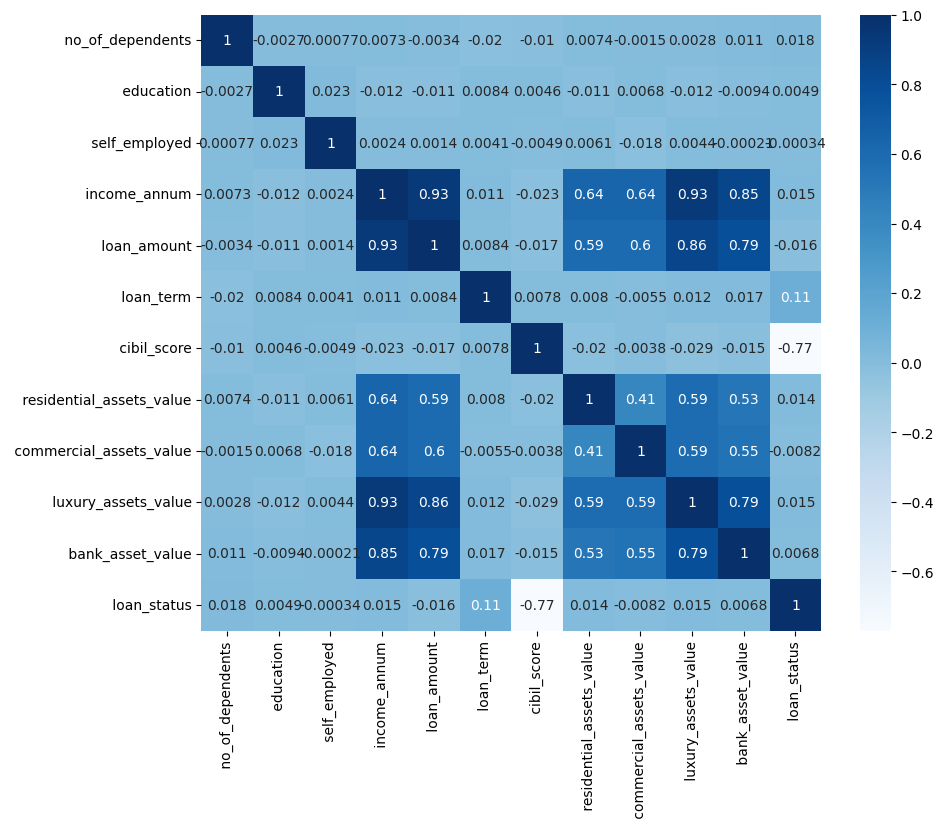

In [29]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot = True,cmap = "Blues")
plt.show()

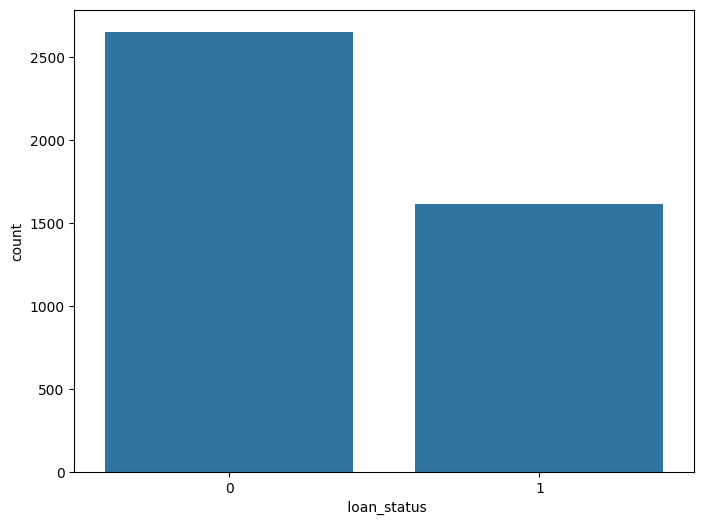

In [30]:
plt.figure(figsize = (8,6))
sns.countplot(df,x = " loan_status")
plt.show()

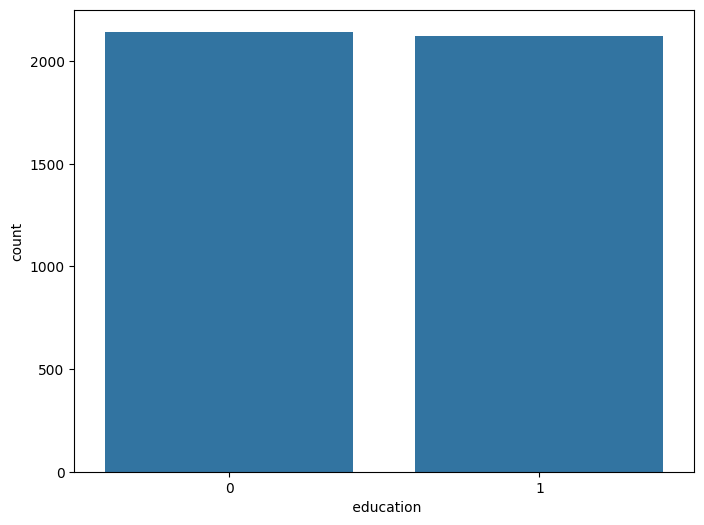

In [31]:
plt.figure(figsize = (8,6))
sns.countplot(df,x = " education")
plt.show()

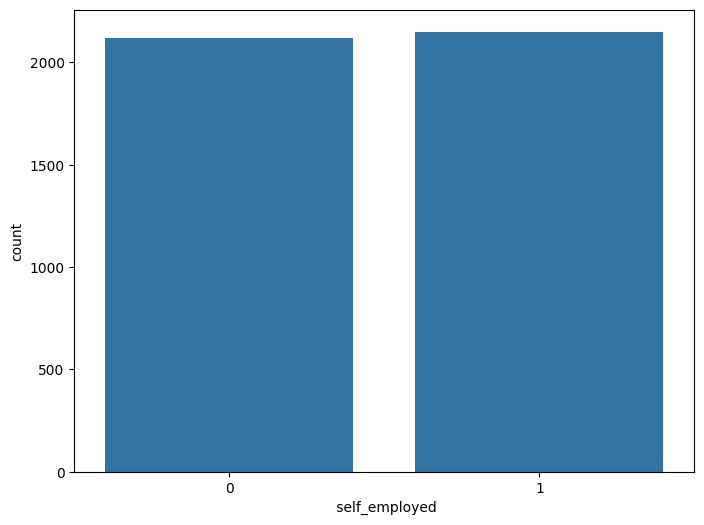

In [32]:
plt.figure(figsize = (8,6))
sns.countplot(df,x = " self_employed")
plt.show()

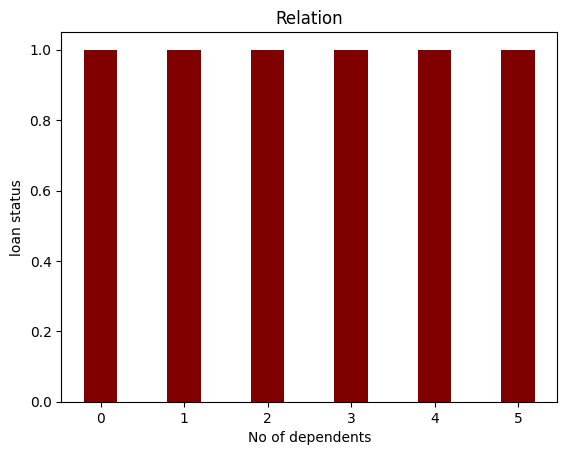

In [42]:
x = df[" no_of_dependents"]
y = df[" loan_status"]
plt.bar(x, y, color ='maroon', 
        width = 0.4)
 
plt.xlabel("No of dependents")
plt.ylabel("loan status")
plt.title("Relation")
plt.show()

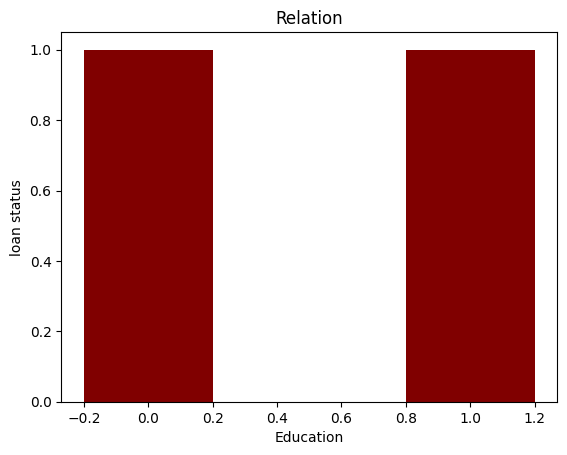

In [43]:
x = df[" education"]
y = df[" loan_status"]
plt.bar(x, y, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Education")
plt.ylabel("loan status")
plt.title("Relation")
plt.show()

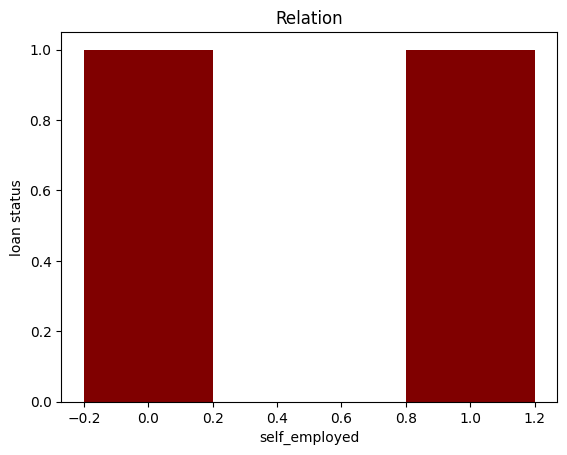

In [45]:
x = df[" self_employed"]
y = df[" loan_status"]
plt.bar(x, y, color ='maroon', 
        width = 0.4)
 
plt.xlabel("self_employed")
plt.ylabel("loan status")
plt.title("Relation")
plt.show()

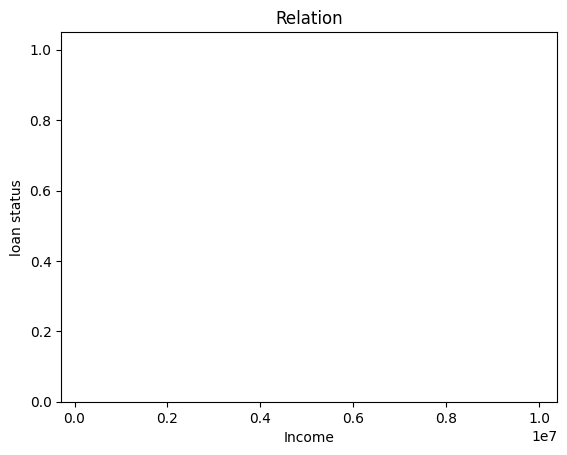

In [46]:
x = df[" income_annum"]
y = df[" loan_status"]
plt.bar(x, y, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Income")
plt.ylabel("loan status")
plt.title("Relation")
plt.show()

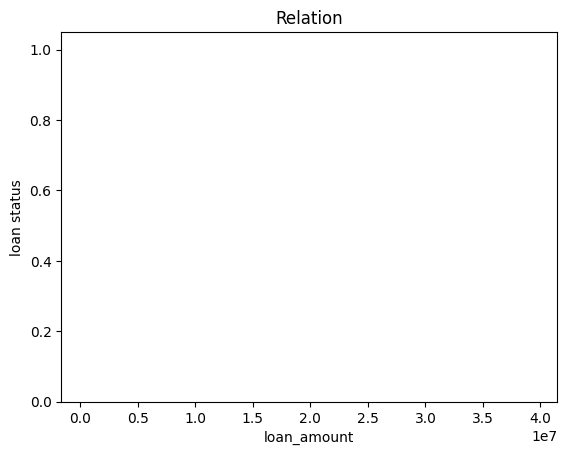

In [47]:
x = df[" loan_amount"]
y = df[" loan_status"]
plt.bar(x, y, color ='maroon', 
        width = 0.4)
 
plt.xlabel("loan_amount")
plt.ylabel("loan status")
plt.title("Relation")
plt.show()

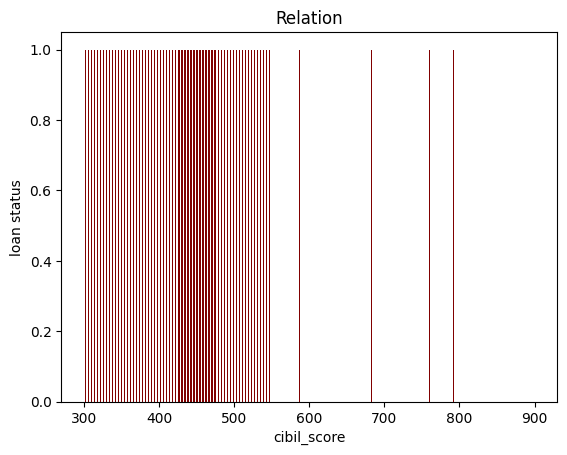

In [48]:
x = df[" cibil_score"]
y = df[" loan_status"]
plt.bar(x, y, color ='maroon', 
        width = 0.4)
 
plt.xlabel("cibil_score")
plt.ylabel("loan status")
plt.title("Relation")
plt.show()

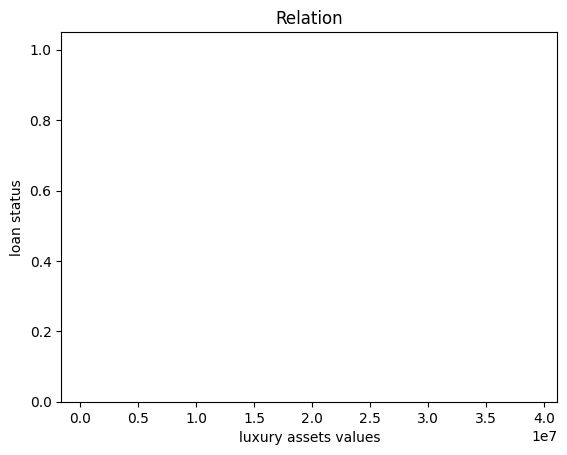

In [50]:
x = df[" luxury_assets_value"]
y = df[" loan_status"]
plt.bar(x, y, color ='maroon', 
        width = 0.4)
 
plt.xlabel("luxury assets values")
plt.ylabel("loan status")
plt.title("Relation")
plt.show()

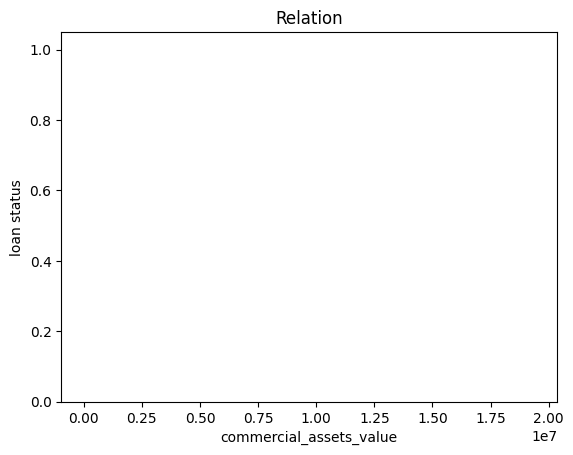

In [51]:
x = df[" commercial_assets_value"]
y = df[" loan_status"]
plt.bar(x, y, color ='maroon', 
        width = 0.4)
 
plt.xlabel("commercial_assets_value")
plt.ylabel("loan status")
plt.title("Relation")
plt.show()

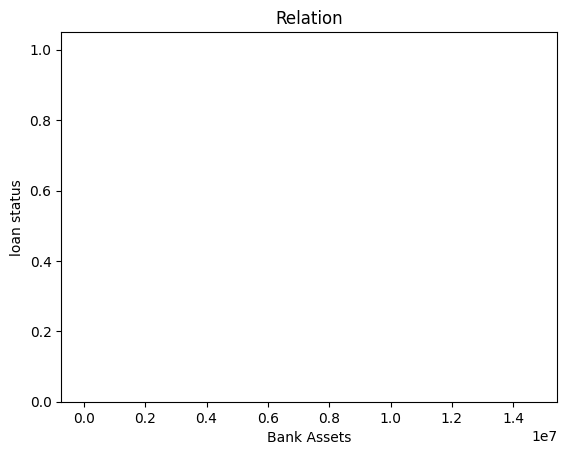

In [54]:
x = df[" bank_asset_value"]
y = df[" loan_status"]
plt.bar(x, y, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Bank Assets")
plt.ylabel("loan status")
plt.title("Relation")
plt.show()

# Data Prepration and split

In [55]:
x = df.drop([" loan_status"],axis=1)
y = df[" loan_status"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [56]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
regpred = reg.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,regpred))
print("Accuracy of Logistic Regression is : ",accuracy_score(y_test,regpred)*100)


              precision    recall  f1-score   support

           0       0.72      0.93      0.81       530
           1       0.77      0.40      0.52       324

    accuracy                           0.73       854
   macro avg       0.74      0.66      0.67       854
weighted avg       0.74      0.73      0.70       854

Accuracy of Logistic Regression is :  72.59953161592506


C:\Users\2909k\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("Mean Absolute Error : ",mean_absolute_error(y_test,regpred))
print("Mean Squared Error : ",mean_squared_error(y_test,regpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,regpred)))
print("R2 Score : ",r2_score(y_test,regpred))


Mean Absolute Error :  0.27400468384074944
Mean Squared Error :  0.27400468384074944
Root Mean Squared Error :  0.5234545671218749
R2 Score :  -0.16373165618448637


In [58]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtreepred = dtree.predict(x_test)

print(classification_report(y_test,dtreepred))
print("Accuracy of Decision Tree is : ",accuracy_score(y_test,dtreepred)*100)


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       530
           1       0.98      0.97      0.98       324

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Accuracy of Decision Tree is :  98.12646370023418


In [59]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,dtreepred))
print("Mean Squared Error : ",mean_squared_error(y_test,dtreepred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,dtreepred)))
print("R2 Score : ",r2_score(y_test,dtreepred))


Mean Absolute Error :  0.01873536299765808
Mean Squared Error :  0.01873536299765808
Root Mean Squared Error :  0.13687718216583097
R2 Score :  0.9204286047053343


In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rfpred = rf.predict(x_test)

print(classification_report(y_test,rfpred))
print("Accuracy of Random Forest is is : ",accuracy_score(y_test,rfpred)*100)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       530
           1       0.98      0.97      0.97       324

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Accuracy of Random Forest is is :  98.00936768149883


In [61]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,rfpred))
print("Mean Squared Error : ",mean_squared_error(y_test,rfpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,rfpred)))
print("R2 Score : ",r2_score(y_test,rfpred))

Mean Absolute Error :  0.01990632318501171
Mean Squared Error :  0.01990632318501171
Root Mean Squared Error :  0.14108976995165776
R2 Score :  0.9154553924994177


# Modelling And Performance

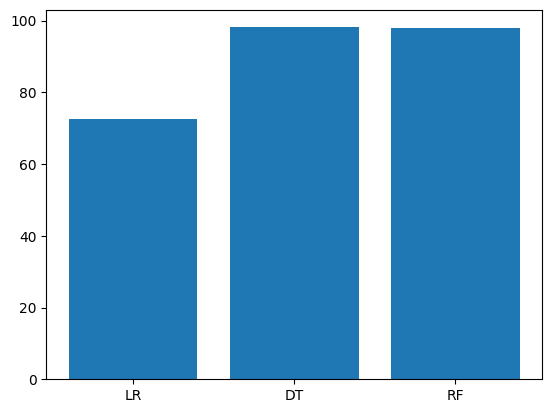

In [62]:
LR = accuracy_score(y_test,regpred)*100
DT = accuracy_score(y_test,dtreepred)*100
RF = accuracy_score(y_test,rfpred)*100

Model = ['LR','DT','RF']
Score = [LR, DT, RF]
barplot = plt.bar(x=Model,height=Score)
plt.show()


In [63]:
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': importances})

feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)


                      feature  importance
6                 cibil_score    0.815642
5                   loan_term    0.056885
4                 loan_amount    0.028969
9         luxury_assets_value    0.018203
3                income_annum    0.017901
7    residential_assets_value    0.017275
8     commercial_assets_value    0.017019
10           bank_asset_value    0.014912
0            no_of_dependents    0.008514
1                   education    0.002341
2               self_employed    0.002339
